**Análisis de datos con pandas:**

1. **Importar los datos desde SQLite:**
   - Conectar a la base de datos SQLite y leer la tabla relevante en un DataFrame usando `pandas`.

2. **Análisis Exploratorio de Datos (EDA):**
   - **Descripción estadística básica:**
     - Calcular métricas como la media, mediana, moda y desviación estándar para las columnas numéricas como `Weight (kg)`, `Height (m)`, `Max_BPM`, `Calories_Burned`, etc.
     - Usar `groupby` para obtener estadísticas segmentadas por columnas categóricas como `Gender`, `Workout_Type`, o `Experience_Level`.

   - **Identificación y tratamiento de valores faltantes:**
     - Identificar columnas con valores nulos o atípicos.
     - Imputar valores faltantes con la media, mediana o una estrategia adecuada.

   - **Transformaciones o filtrados:**
     - Categorizar `Experience_Level` en etiquetas significativas (`Beginner`, `Intermediate`, `Expert`).
     
**Visualización de datos con matplotlib:**

1. **Gráfico de barras (Bar Chart):**
   - Mostrar la media de calorías quemadas (`Calories_Burned`) por tipo de entrenamiento (`Workout_Type`).
   - Incluir etiquetas para los ejes (`Workout Type`, `Average Calories Burned`), un título claro, y una leyenda si es aplicable.

2. **Gráfico de dispersión (Scatter Plot):**
   - Visualizar la relación entre el `BMI` y las calorías quemadas (`Calories_Burned`) para identificar patrones de quema calórica respecto al peso corporal.
   - Usar colores para diferenciar géneros (`Gender`) y agregar etiquetas en los ejes, un título, y una leyenda.

3. **Gráfico de torta (Pie Chart):**
   - Proporción de tipos de entrenamiento (`Workout_Type`) en el conjunto de datos.
   - Etiquetas con porcentajes y un título que resuma los resultados.

4. **Opcional - Gráfico de líneas:**
   - Mostrar la evolución promedio de la frecuencia cardíaca (`Avg_BPM`) durante sesiones clasificadas por niveles de experiencia (`Experience_Level`).
   - Etiquetas en los ejes para indicar tiempo y frecuencia cardíaca.

**Resultados esperados del análisis:**
- Identificación de los entrenamientos más efectivos en términos de calorías quemadas y frecuencia cardíaca.
- Relaciones entre indicadores como `BMI`, nivel de experiencia y rendimiento en los entrenamientos.
- Perfil general de los miembros basado en género, experiencia, y frecuencia de entrenamiento.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db_path = "/home/juan-pablo/Documentos/Toma de Decisiones 1/DB/fitness_data.db"

In [3]:
conn = sqlite3.connect(db_path)

# Retrieve the list of tables to identify the one containing relevant data
tables_query = "SELECT * FROM fitness_data;"
df = pd.read_sql_query(tables_query, conn)

df.head(10)

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_week,Experience_Level,BMI
0,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.2
2,46,Female,74.9,1.53,179,151,66,1.3,883,HIIT,33.9,2.1,4,2,32.0
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.7,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
7,36,Male,70.3,1.72,174,169,73,1.49,1385,Cardio,21.3,2.3,3,2,23.76
8,40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
9,28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34


In [4]:
conn.close()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          974 non-null    object
 1   Gender                       974 non-null    object
 2   Weight_kg                    974 non-null    object
 3   Height_m                     974 non-null    object
 4   Max_BPM                      974 non-null    object
 5   Avg_BPM                      974 non-null    object
 6   Resting_BPM                  974 non-null    object
 7   Session_Duration_hours       974 non-null    object
 8   Calories_Burned              974 non-null    object
 9   Workout_Type                 974 non-null    object
 10  Fat_Percentage               974 non-null    object
 11  Water_Intake_liters          974 non-null    object
 12  Workout_Frequency_days_week  974 non-null    object
 13  Experience_Level             974 no

In [6]:
# Lista de columnas que deberían ser numéricas
numerical_columns = [
    'Age', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration_hours', 'Calories_Burned', 'Fat_Percentage',
    'Water_Intake_liters', 'Workout_Frequency_days_week', 'Experience_Level', 'BMI'
]

# Convertir columnas numéricas de objeto a float (o int donde aplique)
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir, gestionando errores como NaN

# Verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          973 non-null    float64
 1   Gender                       974 non-null    object 
 2   Weight_kg                    973 non-null    float64
 3   Height_m                     973 non-null    float64
 4   Max_BPM                      973 non-null    float64
 5   Avg_BPM                      973 non-null    float64
 6   Resting_BPM                  973 non-null    float64
 7   Session_Duration_hours       973 non-null    float64
 8   Calories_Burned              973 non-null    float64
 9   Workout_Type                 974 non-null    object 
 10  Fat_Percentage               973 non-null    float64
 11  Water_Intake_liters          973 non-null    float64
 12  Workout_Frequency_days_week  973 non-null    float64
 13  Experience_Level    

In [7]:
# Identificación y tratamiento de valores faltantes
missing_values = df.isnull().sum()
missing_values

Age                            1
Gender                         0
Weight_kg                      1
Height_m                       1
Max_BPM                        1
Avg_BPM                        1
Resting_BPM                    1
Session_Duration_hours         1
Calories_Burned                1
Workout_Type                   0
Fat_Percentage                 1
Water_Intake_liters            1
Workout_Frequency_days_week    1
Experience_Level               1
BMI                            1
dtype: int64

In [8]:
df.head(5)

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_week,Experience_Level,BMI
0,NaN,Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout_Type,NaN,NaN,NaN,NaN,NaN
1,56.0,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,Yoga,12.6,3.5,4.0,3.0,30.20
2,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,883.0,HIIT,33.9,2.1,4.0,2.0,32.00
3,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
4,25.0,Male,53.2,1.70,190.0,164.0,56.0,0.59,532.0,Strength,28.8,2.1,3.0,1.0,18.41


In [9]:
df.dropna()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_week,Experience_Level,BMI
1,56.0,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,Yoga,12.6,3.5,4.0,3.0,30.20
2,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,883.0,HIIT,33.9,2.1,4.0,2.0,32.00
3,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
4,25.0,Male,53.2,1.70,190.0,164.0,56.0,0.59,532.0,Strength,28.8,2.1,3.0,1.0,18.41
5,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,29.2,2.8,3.0,1.0,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,24.0,Male,87.1,1.74,187.0,158.0,67.0,1.57,1364.0,Strength,10.0,3.5,4.0,3.0,28.77
970,25.0,Male,66.6,1.61,184.0,166.0,56.0,1.38,1260.0,Strength,25.0,3.0,2.0,1.0,25.69
971,59.0,Female,60.4,1.76,194.0,120.0,53.0,1.72,929.0,Cardio,18.8,2.7,5.0,3.0,19.50
972,32.0,Male,126.4,1.83,198.0,146.0,62.0,1.10,883.0,HIIT,28.2,2.1,3.0,2.0,37.74


In [10]:
# Descripción estadística básica
desc_stats = df.describe()

In [11]:
# Agrupar estadísticas segmentadas por columnas categóricas
grouped_gender = df.groupby('Gender').mean(numeric_only=True)
grouped_workout_type = df.groupby('Workout_Type').mean(numeric_only=True)
grouped_experience = df.groupby('Experience_Level').mean(numeric_only=True)

In [12]:
# Re-categorizar Experience_Level
experience_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Expert'}
df['Experience_Level_Cat'] = df['Experience_Level'].map(experience_map)

In [13]:
# Imprimir resultados clave en consola
print("Descripción Estadística Básica del Dataset:\n", desc_stats)
print("\nEstadísticas Segmentadas por Género:\n", grouped_gender)
print("\nEstadísticas Segmentadas por Tipo de Ejercicio:\n", grouped_workout_type)
print("\nEstadísticas Segmentadas por Nivel de Experiencia:\n", grouped_experience)
print("\nValores Faltantes por Columna:\n", missing_values)

Descripción Estadística Básica del Dataset:
               Age   Weight_kg   Height_m     Max_BPM     Avg_BPM  Resting_BPM  \
count  973.000000  973.000000  973.00000  973.000000  973.000000   973.000000   
mean    38.683453   73.854676    1.72258  179.883864  143.766701    62.223022   
std     12.180928   21.207500    0.12772   11.525686   14.345101     7.327060   
min     18.000000   40.000000    1.50000  160.000000  120.000000    50.000000   
25%     28.000000   58.100000    1.62000  170.000000  131.000000    56.000000   
50%     40.000000   70.000000    1.71000  180.000000  143.000000    62.000000   
75%     49.000000   86.000000    1.80000  190.000000  156.000000    68.000000   
max     59.000000  129.900000    2.00000  199.000000  169.000000    74.000000   

       Session_Duration_hours  Calories_Burned  Fat_Percentage  \
count              973.000000       973.000000      973.000000   
mean                 1.256423       905.422405       24.976773   
std                  0.3430

In [14]:
df['Gender'].unique()

array(['Gender', 'Male', 'Female'], dtype=object)

In [15]:
# Eliminar filas donde 'Gender' tenga el valor incorrecto 'Gender'
df = df[df['Gender'] != 'Gender']

# Verificar nuevamente los valores únicos
print("Valores únicos en 'Gender' después de la corrección:", df['Gender'].unique())

Valores únicos en 'Gender' después de la corrección: ['Male' 'Female']


<Figure size 1000x600 with 0 Axes>

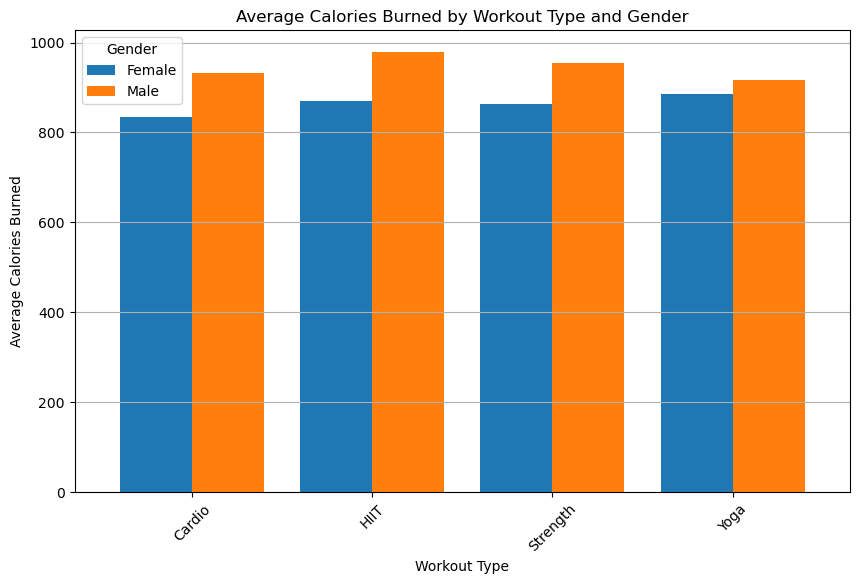

In [16]:
# Crear un gráfico de barras para hombres y mujeres en la misma visualización
avg_calories_by_workout_gender = df.groupby(['Workout_Type', 'Gender'])['Calories_Burned'].mean().unstack()

plt.figure(figsize=(10, 6))
avg_calories_by_workout_gender.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned by Workout Type and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()


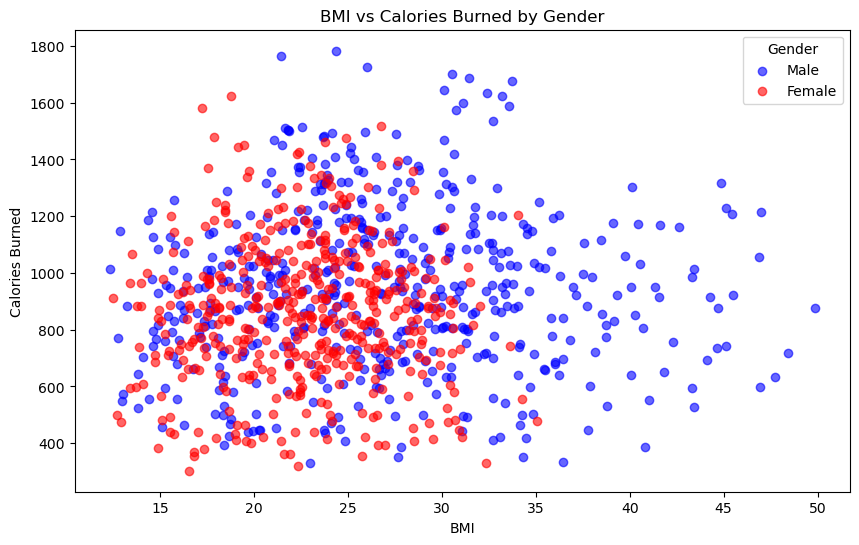

In [17]:
#Gráfico de dispersión: Relación entre BMI y calorías quemadas por género
colors = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['BMI'], subset['Calories_Burned'], label=gender, alpha=0.6, c=colors[gender])

plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.title('BMI vs Calories Burned by Gender')
plt.legend(title='Gender')
plt.show()

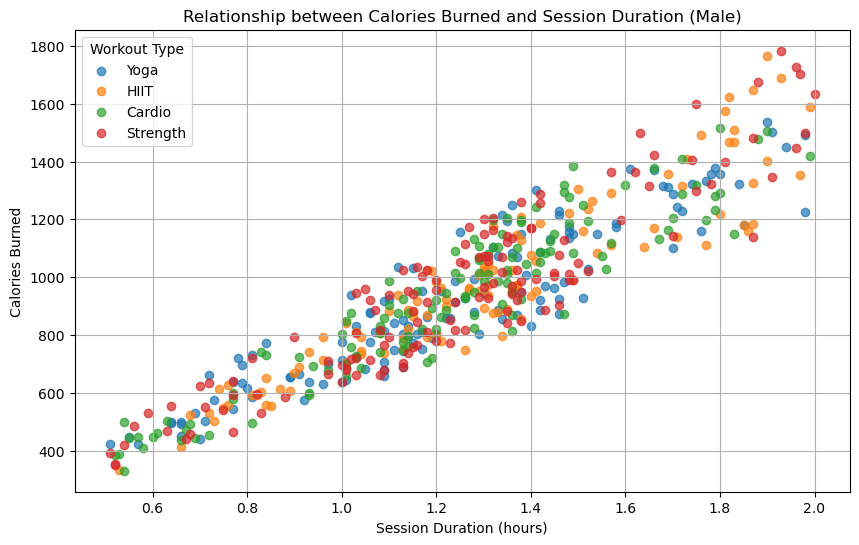

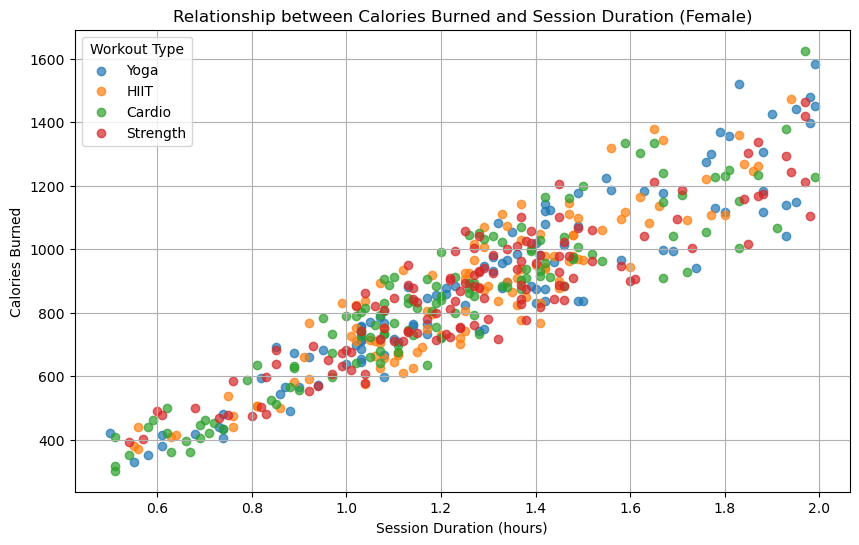

In [18]:
# Crear un gráfico de dispersión para mostrar la relación entre calorías quemadas y duración de la sesión por género y tipo de ejercicio
genders = df['Gender'].unique()

for gender in genders:
    plt.figure(figsize=(10, 6))
    for workout_type in df['Workout_Type'].unique():
        subset = df[(df['Gender'] == gender) & (df['Workout_Type'] == workout_type)]
        plt.scatter(subset['Session_Duration_hours'], 
                    subset['Calories_Burned'], 
                    label=workout_type, alpha=0.7)

    plt.xlabel('Session Duration (hours)')
    plt.ylabel('Calories Burned')
    plt.title(f'Relationship between Calories Burned and Session Duration ({gender})')
    plt.grid(True)
    plt.legend(title='Workout Type')
    plt.show()


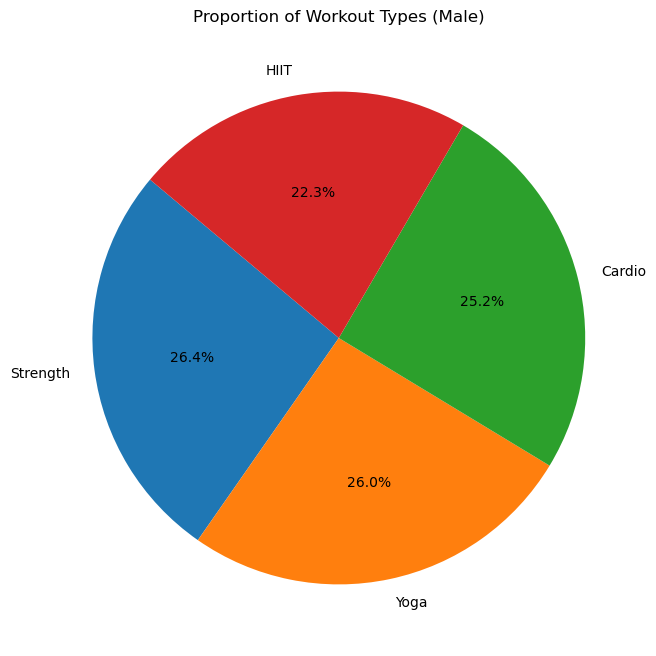

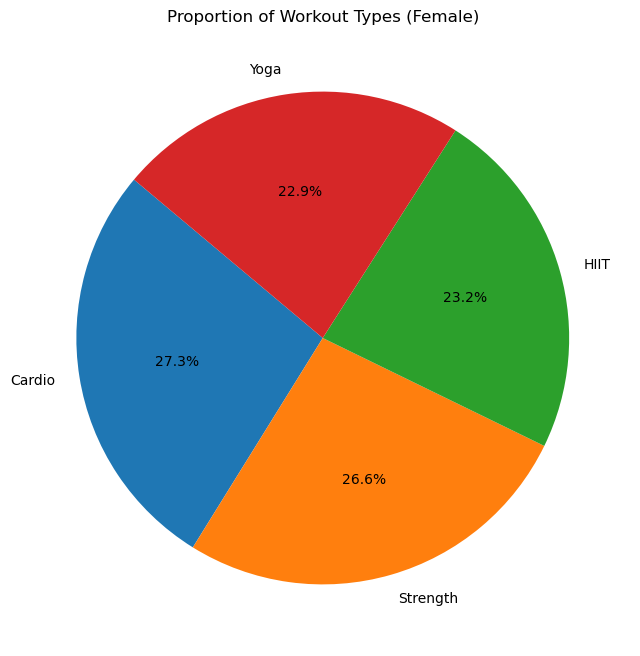

In [19]:
# Crear gráficos de torta separados para hombres y mujeres
genders = df['Gender'].unique()

for gender in genders:
    # Filtrar datos por género y contar la proporción de tipos de entrenamiento
    workout_type_counts_gender = df[df['Gender'] == gender]['Workout_Type'].value_counts()

    # Crear gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie(workout_type_counts_gender, labels=workout_type_counts_gender.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of Workout Types ({gender})')
    plt.show()


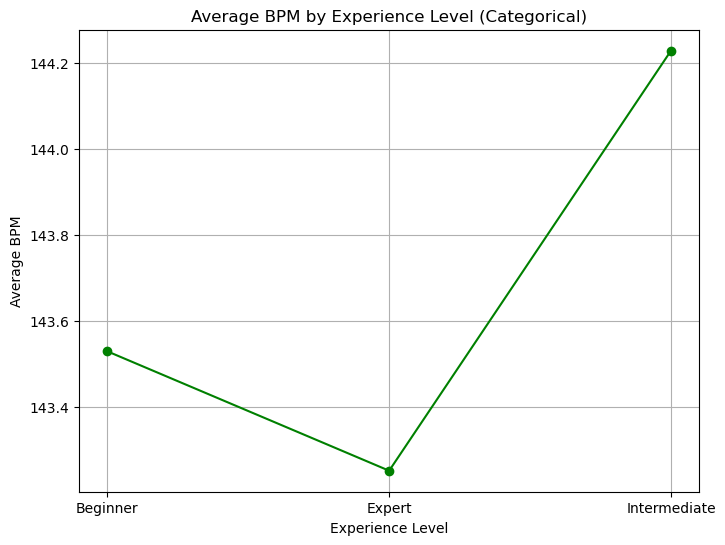

In [20]:
# Calcular el promedio de BPM agrupado por el nivel de experiencia categórico
avg_bpm_by_experience_cat = df.groupby('Experience_Level_Cat')['Avg_BPM'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(avg_bpm_by_experience_cat.index, avg_bpm_by_experience_cat.values, marker='o', linestyle='-', color='green')
plt.xlabel('Experience Level')
plt.ylabel('Average BPM')
plt.title('Average BPM by Experience Level (Categorical)')
plt.grid(True)
plt.show()

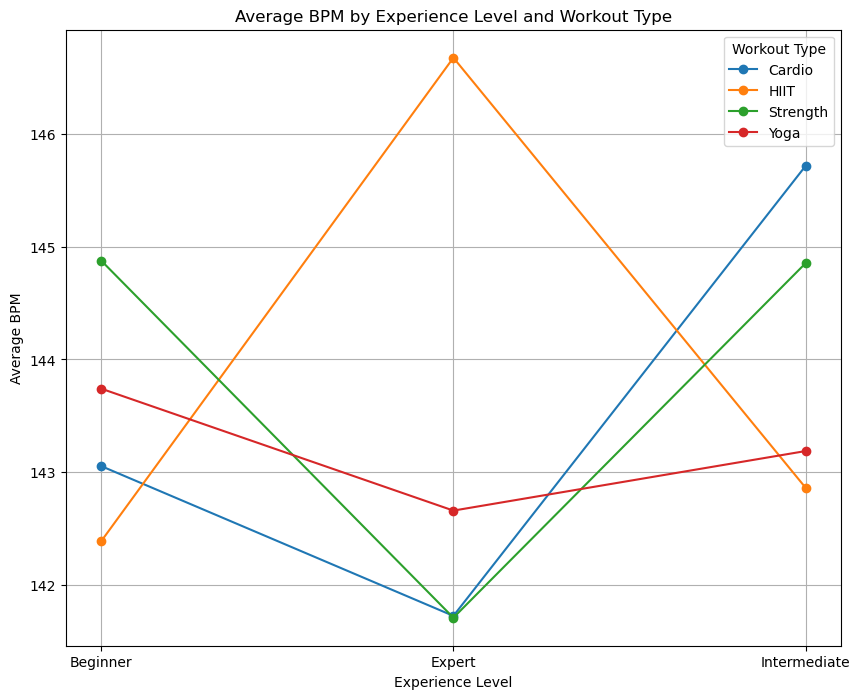

In [21]:
# Calcular el promedio de BPM agrupado por nivel de experiencia y tipo de entrenamiento
avg_bpm_by_experience_and_workout = df.groupby(['Experience_Level_Cat', 'Workout_Type'])['Avg_BPM'].mean().unstack()

# Crear el gráfico de líneas para cada tipo de entrenamiento
plt.figure(figsize=(10, 8))
for workout_type in avg_bpm_by_experience_and_workout.columns:
    plt.plot(avg_bpm_by_experience_and_workout.index, 
             avg_bpm_by_experience_and_workout[workout_type], 
             marker='o', 
             linestyle='-', 
             label=workout_type)

plt.xlabel('Experience Level')
plt.ylabel('Average BPM')
plt.title('Average BPM by Experience Level and Workout Type')
plt.grid(True)
plt.legend(title='Workout Type')
plt.show()


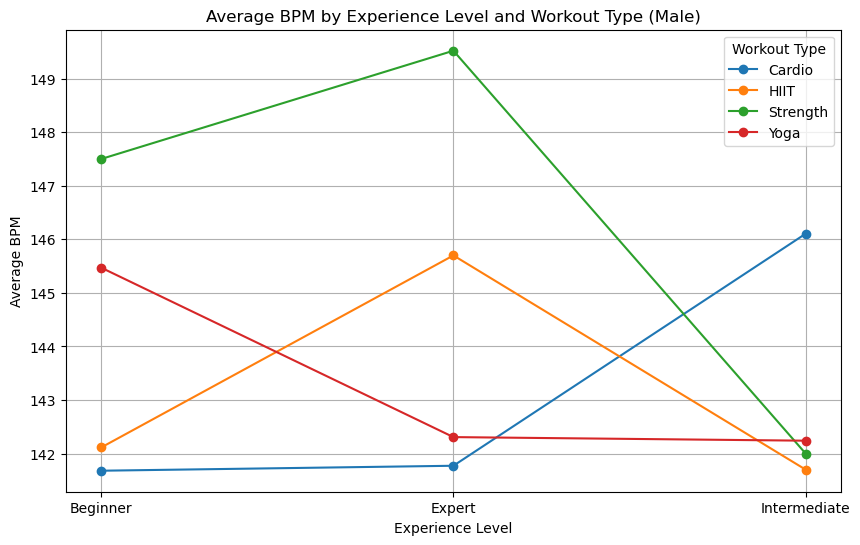

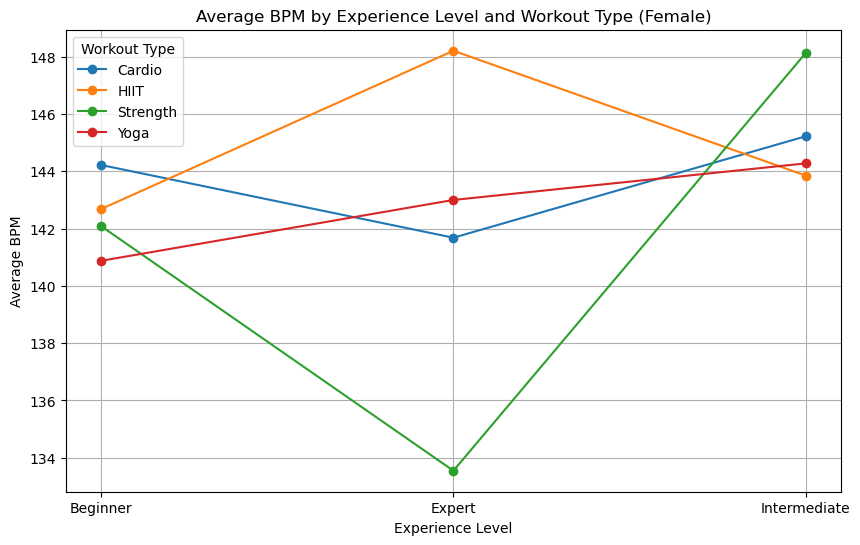

In [22]:
# Crear gráficos separados para hombres y mujeres
genders = df['Gender'].unique()

for gender in genders:
    avg_bpm_by_experience_gender = df[df['Gender'] == gender].groupby(['Experience_Level_Cat', 'Workout_Type'])['Avg_BPM'].mean().unstack()

    plt.figure(figsize=(10, 6))
    for workout_type in avg_bpm_by_experience_gender.columns:
        plt.plot(avg_bpm_by_experience_gender.index, 
                 avg_bpm_by_experience_gender[workout_type], 
                 marker='o', 
                 linestyle='-', 
                 label=workout_type)

    plt.xlabel('Experience Level')
    plt.ylabel('Average BPM')
    plt.title(f'Average BPM by Experience Level and Workout Type ({gender})')
    plt.grid(True)
    plt.legend(title='Workout Type')
    plt.show()


In [23]:
df.to_csv('GymCleanData.csv', index=False)